In [310]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import transforms
import cv2

import os
import numpy as np
import random

## x=> coco left upper honrizontal coordinate, y=> coco left upper vertical coordinate
## 
## Take note of x,y, xc,yc when changing image

In [358]:
def yolo_cc(file): #from yolo txt file to coco format
    x = (x_yl-w_yl/2)*width #weight is the size of the image
    y = (y_yl*height-h_yl/2)*height
    w = w_yl*width
    h = h_yl*height
    return x,y,w,h
    
    
#txt file: label, center_x, certer_y,w,h
def gaussian(xc,yc, s, sig, box_size): #xc, yc are coordinates respective to the bbox, xc<w;yc<h
    gus_patch = np.zeros((box_size[1],box_size[0]))
    for xb in range(box_size[1]):
        for yb in range(box_size[0]):            
            r = (xb-xc)**2+(yb-yc)**2
            gus_patch[xb][yb] = s*np.exp(-r/(2*sig**2))
    gus_patch = np.repeat(gus_patch[...,np.newaxis],3,axis = 2)
    return gus_patch

def patched_image(im,patch,x,y,w,h):
    im = np.array(im)
    im_dp = im.astype(float)
    im_dp[y:y+h,x:x+w,:] = im_dp[y:y+h,x:x+w,:] + patch
    return im_dp


In [409]:
x

250

In [410]:
y

600

In [334]:
 np.zeros((box_size[1],box_size[0])).shape

(400, 600)

In [347]:
im.shape

(1440, 1080, 3)

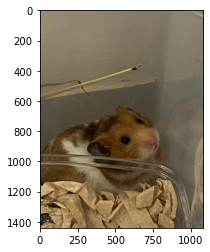

In [335]:
im = cv2.imread('hamster.jpg')
plt.imshow(im[...,::-1])

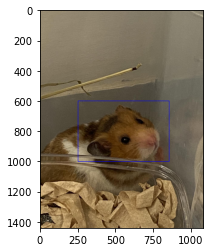

In [336]:
bbox = (250,600,600,400)
x, y, w, h = (250,600,600,400)
cv2.rectangle(im, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(im[...,::-1])

### Add single gaussian noise to the image

In [337]:
s = 1000
sig = 20
box_size = (w,h)
xc = 150
yc = 400

gus_patch = gaussian(xc,yc, s, sig, box_size)

In [338]:
im_p[y:y+h,x:x+w,:].shape

(400, 600, 3)

In [339]:
im_p = im
im_p = np.array(im_p)
im_p = im_p.astype(float)
im_p[y:y+h,x:x+w,:] = im_p[y:y+h,x:x+w,:] + gus_patch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


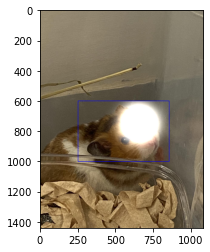

In [340]:
#after add noise
cv2.rectangle(im_p, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(im_p[...,::-1]/255)
#Numpy requires float between 1 to 0 or int between 255 to 0.

### Add multiple gaussian noise to the image

In [469]:
im_dp = im

centers = list()
centers = [299,700,450,900,500,1100] # a list of centers of the guassian function, parameters to be updated
# the even one is y(honrizontal), the odd one is x (vertical); x between 600-1000,y between 250-800
#? we should have coordinates related to bbox or related to whole image

s = 1000
sig = 20.07
box_size = (w,h)

def multiple_gussians(centers, s, sig, box_size):
    zeros = np.zeros((box_size[1],box_size[0]))
    patch_sum = np.repeat(zeros[...,np.newaxis],3,axis = 2)
    for idx in range(0,len(centers),2):
        xc = centers[idx]-x #x = 250,y = 600
        yc = centers[idx+1]-y
        print(xc,yc)
        patch = gaussian(xc,yc, s, sig, box_size)
        patch_sum = patch_sum + patch
    return patch_sum
patch_sum = multiple_gussians(centers,s,sig,box_size)

49 100
200 300
250 500


### Please note, nhonrizontal, vertical, x,y;xc,yc

In [470]:
im_dp = patched_image(im,patch_sum,x,y,w,h)
#im = np.array(im)
#im_dp = im.astype(float)
#im_dp[y:y+h,x:x+w,:] = im_dp[y:y+h,x:x+w,:] + patch_sum 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


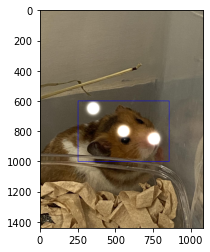

In [471]:
cv2.rectangle(im_dp, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(im_dp[...,::-1]/255)

## Loss Function

In [477]:
from scipy import linalg, optimize

### Get detectors scores for loss function

#### yolov3

In [ ]:
# N: total number of people,
# firstly loop all images[put all images in a folder, --source data/images/, all results are saved in a folder labels/], then for each image txt labels 0, 
#capture the last element, the confidence level
# if it is people, then add it to the score.


In [10]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cpu (CPU)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=True, save_crop=False, save_txt=True, source='data/images/', update=False, view_img=False, weights=['yolov3.pt'])
image 1/2 C:\Users\dell\huawei-working-folder\yolov3\data\images\bus.jpg: 640x480 4 persons, 1 bus, Done. (1.011s)
image 2/2 C:\Users\dell\huawei-working-folder\yolov3\data\images\zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.721s)
Results saved to runs\detect\exp7
2 labels saved to runs\detect\exp7\labels
Done. (1.918s)


YOLOv3  v9.5.0-13-g1be3170 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients


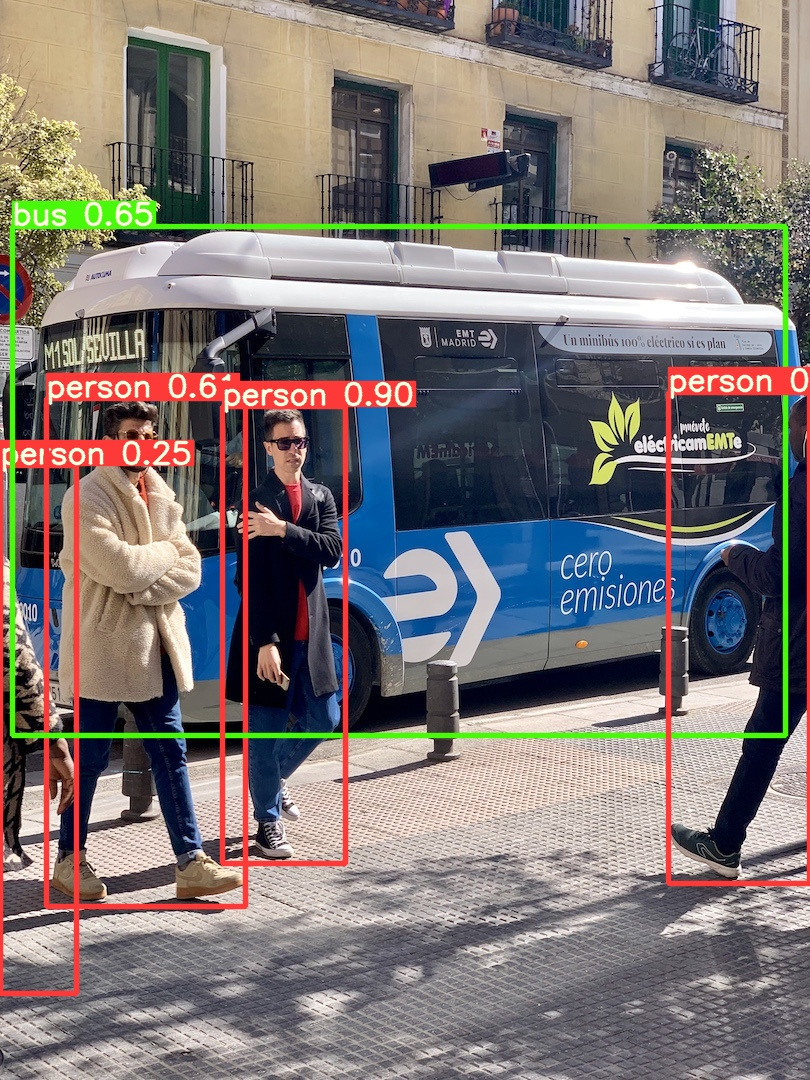

In [17]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --save-conf --save-txt --source data/images/
#--save-txt: save the result in a tyxt file run/detect/labels/txt =>yuolo format
#--save-conf: the last element of each row is the confidence
#--source can detect a groups of images

Image(filename='runs/detect/exp5/zidane.jpg', width=600)
Image(filename='runs/detect/exp5/bus.jpg', width=600)
# show the annotated image

In [ ]:
Faster-RCNN